In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

# Dataset

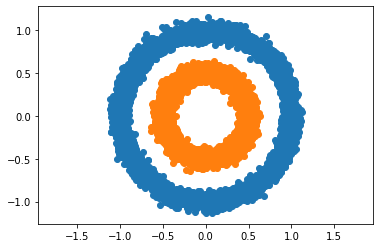

In [2]:
# DATASET
n = 10000 # Cantidad de ejemplo
p = 2 # Dos neuronas o dos clases
X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1]);
plt.scatter(X[Y == 1, 0], X[Y == 1, 1]);
plt.axis('equal');

In [5]:
X = X.T
Y = Y.reshape((1, 10000))
shape_X = X.shape
shape_Y = Y.shape
print("Dimensiones de X: ", shape_X)
print("Dimensiones de Y: ", shape_Y)

Dimensiones de X:  (2, 10000)
Dimensiones de Y:  (1, 10000)


# Red Neuronal

In [6]:
"""
n_x: Cantidad de neuronas en la capa de entrada
n_h: Cantidad de neuronas en la capa oculta
n_y: Cantidad de neuronas en la capa de salida
"""
def layer_dims(X, Y):
    n_x = shape_X[0]
    n_h = 4
    n_y = shape_Y[0]
    
    return n_x, n_h, n_y

layer_dims(X, Y)

(2, 4, 1)

Las funciones de activación serán el Tanh y el Sigmoid, el Tanh lo obtenemos de np.tanh y el Sigmoid crearemos una función.

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# INICIAR PARÁMETROS

Inicializamos los parametros, los pesos en forma aleatorea y los sesgos con zeros

In [8]:
def parametros(X, Y):
    n_x, n_h, n_y = layer_dims(X, Y)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(1, n_h)*0.01
    b2 = np.zeros((1, 1))
    
    return W1, b1, W2, b2

# FORDWARD

In [9]:
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    a1 = np.tanh(Z1)
    Z2 = np.dot(W2, a1) + b2
    A2 = sigmoid(Z2)
    
    return Z1, a1, Z2, A2

In [100]:
W1, b1, W2, b2 = parametros(X, Y)
Z1, a1, Z2, A2 = forward(X, W1, b1, W2, b2)

# FUNCIÓN DE COSTO

Exercise: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [10]:
def loss(Y, A2):
    m = Y.shape[1]
    costo = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))

    cost = - np.sum(costo) / m
    cost = np.squeeze(cost)
    return cost

# GRADIENTE

In [11]:
def gradient(Y, X, W1, b1, W2, b2):
    a0 = X
    Z1, a1, Z2, a2 = forward(X, W1, b1, W2, b2)

    m = X.shape[1]
    
    dZ2 = a2 - Y
    dW2 = (1/m)*np.dot(dZ2, a1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(a1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
      

    return dW2, db2, dW1, db1

# ACTUALIZACIÓN DE PARÁMETROS

In [12]:
def update_param(Y, X, lr,dW2, db2, dW1, db1, W1, b1, W2, b2):
    #dW2, db2, dW1, db1 = gradient(Y, X, W1, b1, W2, b2)#gradient(Y, n_x, n_h, n_y)
    
    W1 = W1 -lr*dW1
    b1 = b1 - lr*db1
    
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2
        
#     dW2, db2, dW1, db1 = gradient(Y, X, W1, b1, W2, b2)
        
    return W1, b1, W2, b2

# NN FINAL

In [13]:
def NN(Y, X, h_neur, n_iteraciones, lr, train = False):
    # parametros iniciales
    n_x, n_h, n_y = layer_dims(X, Y)
    W1, b1, W2, b2 = parametros(X, Y)
    
    # Epoch
    epoch = []
    
    for i in range(n_iteraciones):
        # Forward
        Z1, a1, Z2, A2 = forward(X, W1, b1, W2, b2) # retorna Z1, a1, Z2, A2
        
        # Costo
        cost = loss(Y, A2)
        
        # gradiente
        dW2, db2, dW1, db1 = gradient(Y, X, W1, b1, W2, b2)
        
        # Update
        W1, b1, W2, b2 = update_param(Y, X, lr, dW2, db2, dW1, db1, W1, b1, W2, b2)
        
        zx = np.round(A2)
        
        Accuaracy = (1 - cost)*100
        
        epoch.append(cost)
        
        if i%1000 == 0 and train:
            print('Costo: ', cost, 'Accuaracy', Accuaracy)

    cache = {'W1': W1,
             'b1': b1,
             'W2': W2,
             'b2': b2,
             'A2': A2}
    return cache, epoch

In [14]:
h_neur = 4
n_iteraciones =20000
cache, epoch = NN(Y, X, h_neur, n_iteraciones, lr = 7, train = True)

Costo:  0.6931472093644516 Accuaracy 30.685279063554837
Costo:  0.693146237940199 Accuaracy 30.6853762059801
Costo:  0.4668077626251779 Accuaracy 53.31922373748221
Costo:  0.8431008754147824 Accuaracy 15.68991245852176
Costo:  0.8401009747559274 Accuaracy 15.989902524407263
Costo:  0.8385229701374316 Accuaracy 16.14770298625684
Costo:  0.8376090675557661 Accuaracy 16.239093244423387
Costo:  0.8370372222561606 Accuaracy 16.296277774383938
Costo:  0.8366616435072165 Accuaracy 16.33383564927835
Costo:  0.8364088548599596 Accuaracy 16.359114514004037
Costo:  0.8362403627480497 Accuaracy 16.37596372519503
Costo:  0.8361405263342876 Accuaracy 16.38594736657124
Costo:  0.8361351553907913 Accuaracy 16.38648446092087
Costo:  0.01271697192809082 Accuaracy 98.72830280719091
Costo:  0.002539945828491777 Accuaracy 99.74600541715081
Costo:  0.0014670921006844826 Accuaracy 99.85329078993155
Costo:  0.0010551126549955456 Accuaracy 99.89448873450044
Costo:  0.0008436078259482415 Accuaracy 99.9156392174

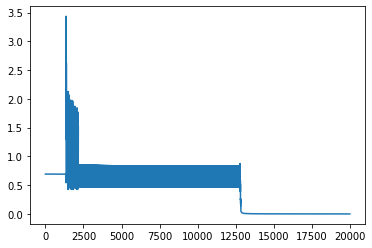

In [24]:
plt.plot(epoch)

 predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5 \\ 0 & \text{otherwise} \end{cases}$

In [29]:
pred = np.round(cache['A2'])

Y - pred

array([[0., 0., 0., ..., 0., 0., 0.]])

In [27]:
Y

array([[1, 0, 0, ..., 1, 1, 1]], dtype=int64)